
<h3> Importing necessary libraries </h3>

In [ ]:
from IPython.display import display_html
def restartkernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
    
restartkernel()

In [1]:
import qlayers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

Enter number of qubits (default=4): 5
Which circuits do you want to select? Separate each option by 1 space.
1 2
1. <Quantum Keras Layer: func=qnode1>
2. <Quantum Keras Layer: func=qnode2>


<h3> Instantiating and visualizing the Moons dataset from Scikit-Learn </h3>

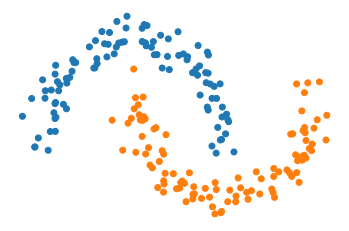

In [2]:
# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

X, y = make_moons(n_samples=200, noise=0.1)
y_hot = tf.keras.utils.to_categorical(y, num_classes=2)  # one-hot encoded labels

c = ["#1f77b4" if y_ == 0 else "#ff7f0e" for y_ in y]  # colours for each class
plt.axis("off")
plt.scatter(X[:, 0], X[:, 1], c=c)
plt.show()

<h3> Creating model with classical and quantum layers </h3> 

In [6]:
tf.keras.backend.set_floatx('float64')

clayer_1 = tf.keras.layers.Dense(4)
qlayer_1 = qlayers.list_of_qlayers[0]
qlayer_2 = qlayers.list_of_qlayers[1]
clayer_2 = tf.keras.layers.Dense(2, activation="softmax")

In [7]:
# construct the model
inputs = tf.keras.Input(shape=(2,))
x = clayer_1(inputs)
x_1, x_2 = tf.split(x, 2, axis=1)
x_1 = qlayer_1(x_1)
x_2 = qlayer_2(x_2)
x = tf.concat([x_1, x_2], axis=1)
outputs = clayer_2(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [8]:
opt = tf.keras.optimizers.SGD(learning_rate=0.2)
model.compile(opt, loss="mae", metrics=["accuracy"])

fitting = model.fit(X, y_hot, epochs=6, batch_size=5, validation_split=0.25, verbose=1)

Epoch 1/6
30/30 [==============================] - 11s 355ms/step - loss: 0.4657 - accuracy: 0.5267 - val_loss: 0.3984 - val_accuracy: 0.7000
Epoch 2/6
30/30 [==============================] - 11s 356ms/step - loss: 0.3595 - accuracy: 0.6933 - val_loss: 0.2863 - val_accuracy: 0.8000
Epoch 3/6
30/30 [==============================] - 11s 351ms/step - loss: 0.2813 - accuracy: 0.7467 - val_loss: 0.2369 - val_accuracy: 0.7800
Epoch 4/6
30/30 [==============================] - 11s 361ms/step - loss: 0.2357 - accuracy: 0.7867 - val_loss: 0.2023 - val_accuracy: 0.8400
Epoch 5/6
30/30 [==============================] - 11s 356ms/step - loss: 0.2008 - accuracy: 0.8067 - val_loss: 0.1803 - val_accuracy: 0.8400
Epoch 6/6
30/30 [==============================] - 11s 352ms/step - loss: 0.1772 - accuracy: 0.8267 - val_loss: 0.1747 - val_accuracy: 0.8400


In [9]:
qlayer_1.get_weights()

[array([ 0.00773201, -0.08075827,  0.54524496,  0.11345483,  0.45099061])]

In [10]:
qlayer_2.get_weights()

[array([-0.11677951,  0.71945714, -0.62160516, -0.60296658, -0.24708825])]

<h3> Result Plots </h3>

In [11]:
def plot_history(history, mode, model_number):
    if mode == "ACC":
        mode = 'accuracy'
    elif mode == "LOSS":
        mode = 'loss'
    else:
        print("ERROR")
        
    plt.plot(history.history[f"{mode}"])
    plt.plot(history.history[f"val_{mode}"])
    plt.title(f"model{model_number} {mode}")
    plt.ylabel(f'{mode}')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

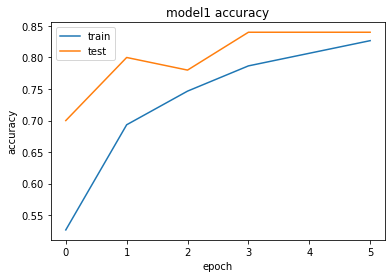

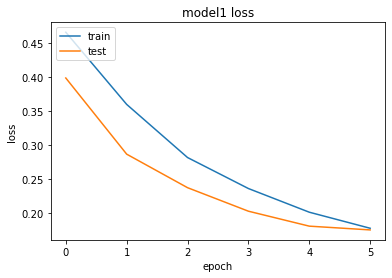

In [12]:
plot_history(fitting, "ACC", 1)
plot_history(fitting, "LOSS", 1)